In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = 'normal_hping3_5500_1por1.csv'

df = pd.read_csv(data)

In [4]:
df.shape

(5500, 7)

In [5]:
df.head()

,SSIP,SSP,SDFP,SDFB,SFE,RFIP,CLASS
0,7.000000,1.666667,49580.404316,2.082423e+06,31112.000000,0.000214,1
1,7.000000,1.666667,41663.682036,1.750235e+06,56486.000000,0.000118,1
2,7.000000,1.666667,30837.438651,1.295181e+06,5598.666667,0.001191,1
3,6.666667,1.666667,4.825871,8.072613e+02,1105.333333,0.006030,0
4,7.000000,1.666667,520.428547,1.568241e+07,20328.333333,0.000344,0


In [6]:

col_names = df.columns

col_names

Index(['SSIP', 'SSP', 'SDFP', 'SDFB', 'SFE', 'RFIP', 'CLASS'], dtype='object')

In [7]:
# remove leading spaces from column names

df.columns = df.columns.str.strip()

In [8]:
# view column names again

df.columns

Index(['SSIP', 'SSP', 'SDFP', 'SDFB', 'SFE', 'RFIP', 'CLASS'], dtype='object')

In [9]:
# check distribution of target_class column

df['CLASS'].value_counts()

CLASS
1    2750
0    2750
Name: count, dtype: int64

In [10]:
# view the percentage distribution of target_class column

df['CLASS'].value_counts()/np.float64(len(df))

CLASS
1    0.5
0    0.5
Name: count, dtype: float64

In [11]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SSIP    5500 non-null   float64
 1   SSP     5500 non-null   float64
 2   SDFP    5500 non-null   float64
 3   SDFB    5500 non-null   float64
 4   SFE     5500 non-null   float64
 5   RFIP    5500 non-null   float64
 6   CLASS   5500 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 300.9 KB


In [12]:
# check for missing values in variables

df.isnull().sum()

SSIP     0
SSP      0
SDFP     0
SDFB     0
SFE      0
RFIP     0
CLASS    0
dtype: int64

In [13]:
# view summary statistics in numerical variables

round(df.describe(),2)

,SSIP,SSP,SDFP,SDFB,SFE,RFIP,CLASS
count,5500.00,5500.00,5500.00,5.500000e+03,5500.00,5500.00,5500.0
mean,6.83,1.66,22001.46,1.133910e+07,67365.15,0.00,0.5
std,0.41,0.19,28223.75,3.183081e+07,114272.25,0.01,0.5
min,2.33,1.33,0.00,0.000000e+00,35.67,0.00,0.0
25%,6.67,1.67,6.50,1.159930e+03,3135.50,0.00,0.0
50%,7.00,1.67,2757.67,1.805303e+06,19912.33,0.00,0.5
75%,7.00,1.67,43259.51,4.122464e+06,77889.33,0.00,1.0
max,7.00,2.00,109260.08,2.126238e+08,634635.67,0.19,1.0


Text(0, 0.5, 'RFIP')

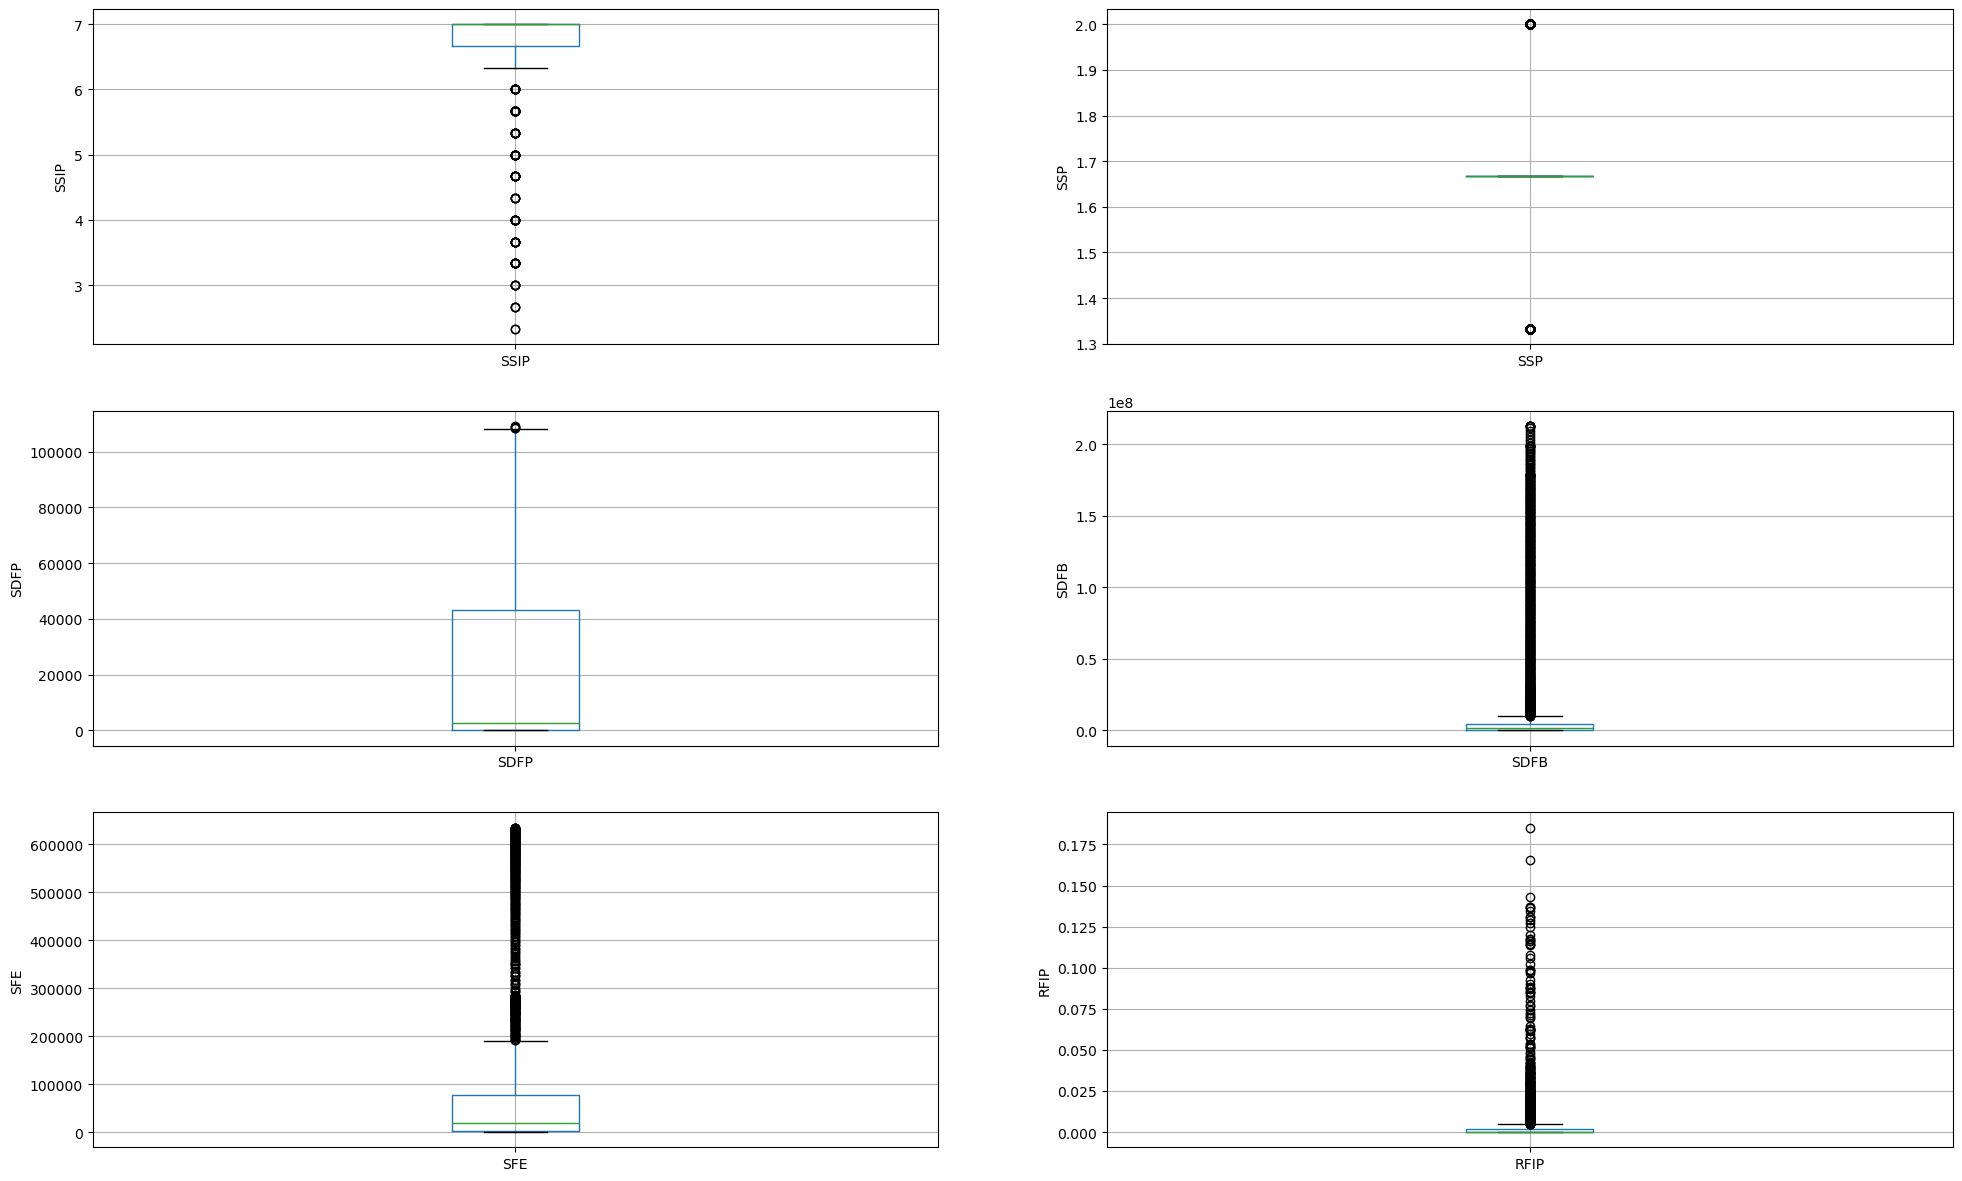

In [14]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='SSIP')
fig.set_title('')
fig.set_ylabel('SSIP')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='SSP')
fig.set_title('')
fig.set_ylabel('SSP')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='SDFP')
fig.set_title('')
fig.set_ylabel('SDFP')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='SDFB')
fig.set_title('')
fig.set_ylabel('SDFB')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='SFE')
fig.set_title('')
fig.set_ylabel('SFE')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='RFIP')
fig.set_title('')
fig.set_ylabel('RFIP')

Text(0, 0.5, 'RFIP')

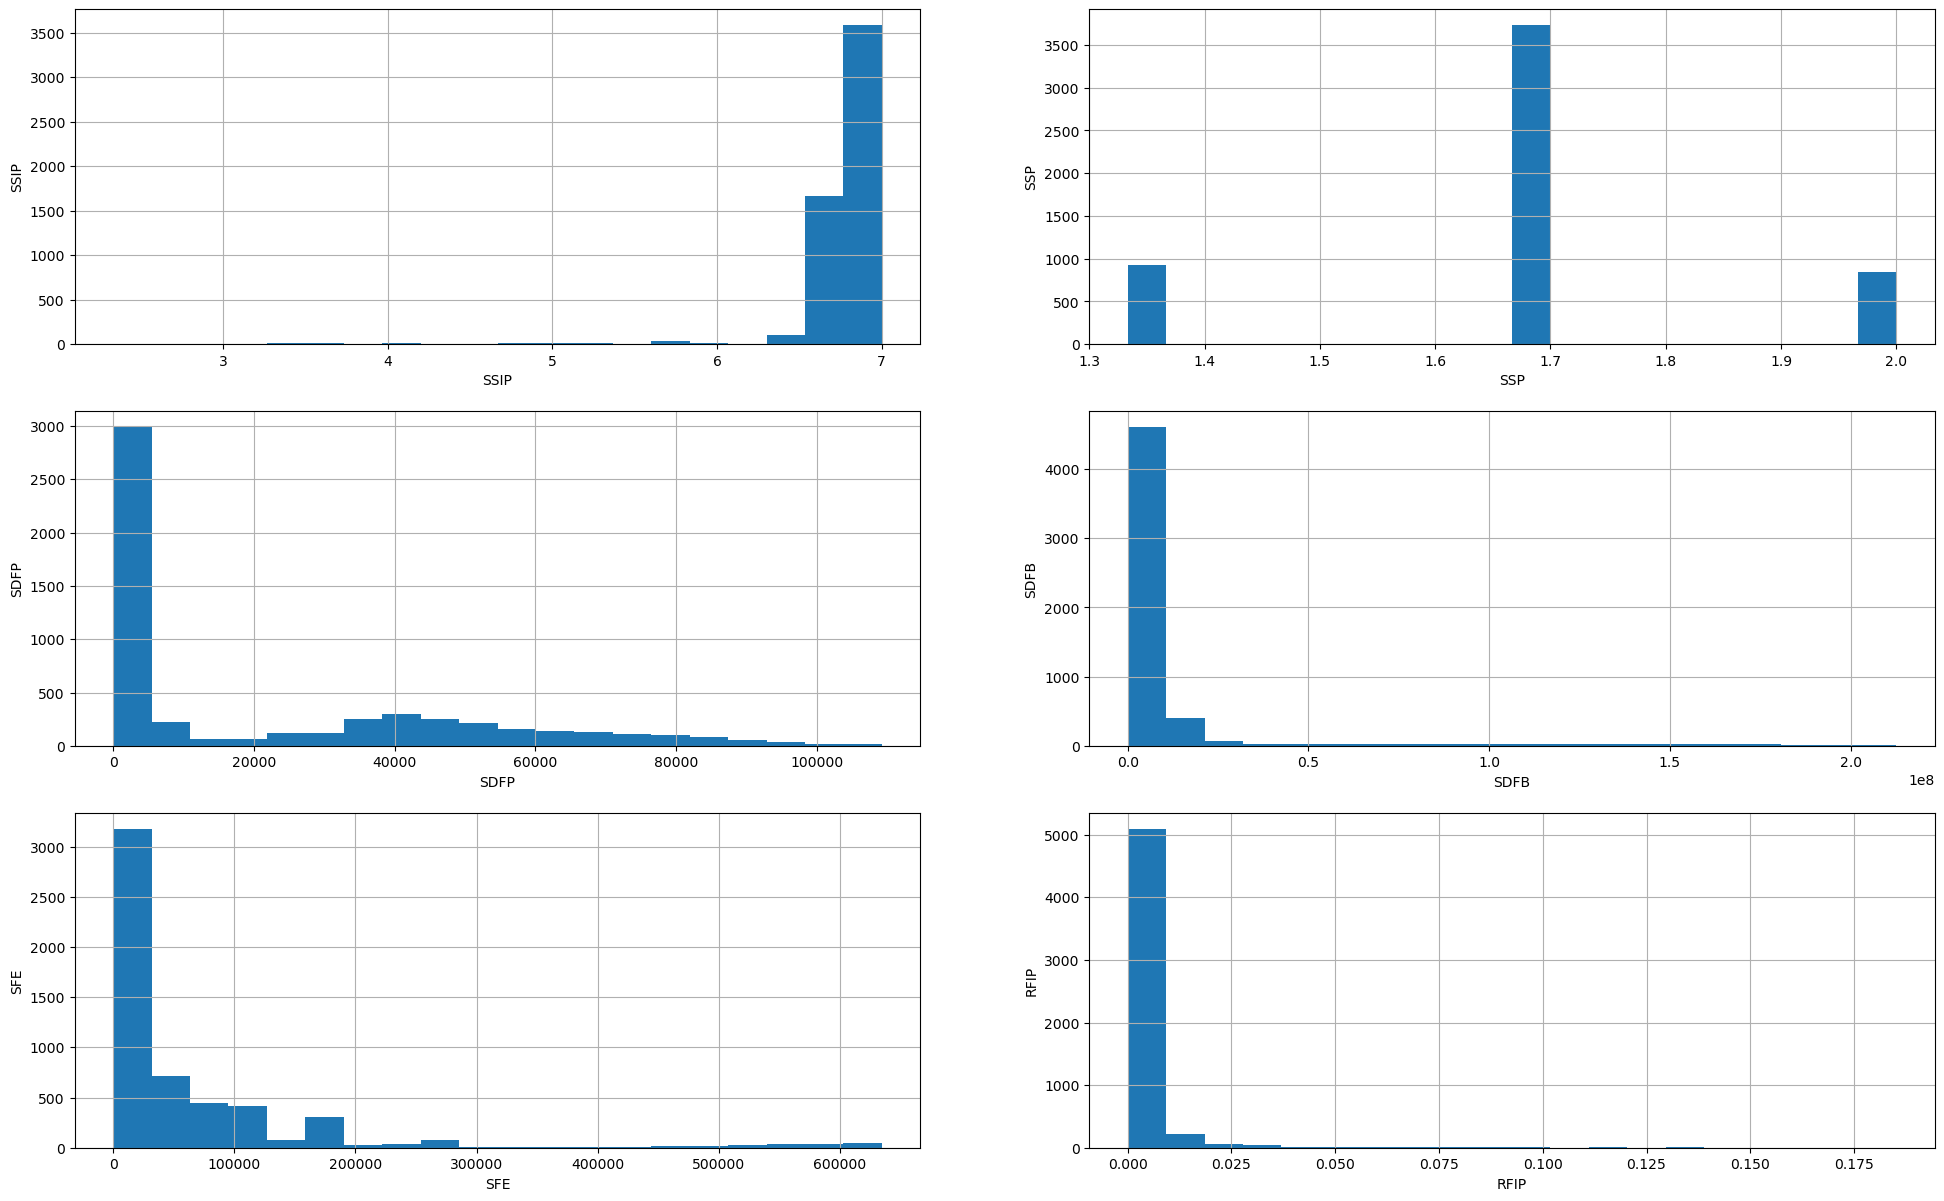

In [15]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['SSIP'].hist(bins=20)
fig.set_xlabel('SSIP')
fig.set_ylabel('SSIP')


plt.subplot(4, 2, 2)
fig = df['SSP'].hist(bins=20)
fig.set_xlabel('SSP')
fig.set_ylabel('SSP')


plt.subplot(4, 2, 3)
fig = df['SDFP'].hist(bins=20)
fig.set_xlabel('SDFP')
fig.set_ylabel('SDFP')



plt.subplot(4, 2, 4)
fig = df['SDFB'].hist(bins=20)
fig.set_xlabel('SDFB')
fig.set_ylabel('SDFB')



plt.subplot(4, 2, 5)
fig = df['SFE'].hist(bins=20)
fig.set_xlabel('SFE')
fig.set_ylabel('SFE')



plt.subplot(4, 2, 6)
fig = df['RFIP'].hist(bins=20)
fig.set_xlabel('RFIP')
fig.set_ylabel('RFIP')


In [16]:
X = df.drop(['CLASS'], axis=1)

y = df['CLASS']

In [17]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Dados de treino
#featureTrain, featureTest, targetTrain, targetTest = train_test_split(features, target, test_size = .25, random_state = 42)

In [18]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((4400, 6), (1100, 6))

In [19]:
cols = X_train.columns

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [21]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [22]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [23]:
X_train.describe()

,SSIP,SSP,SDFP,SDFB,SFE,RFIP
count,4.400000e+03,4.400000e+03,4.400000e+03,4.400000e+03,4.400000e+03,4.400000e+03
mean,1.702880e-15,1.067429e-15,-8.558810e-17,1.776357e-17,-2.260818e-17,-7.266914e-18
std,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00
min,-1.116210e+01,-1.720549e+00,-7.772949e-01,-3.563041e-01,-5.893191e-01,-3.011704e-01
25%,-4.025430e-01,3.592793e-02,-7.770690e-01,-3.562695e-01,-5.618585e-01,-2.942603e-01
50%,4.251156e-01,3.592793e-02,-6.795390e-01,-2.990707e-01,-4.135488e-01,-2.711650e-01
75%,4.251156e-01,3.592793e-02,7.563874e-01,-2.271430e-01,9.914448e-02,-1.055110e-01
max,4.251156e-01,1.792404e+00,3.085928e+00,6.398557e+00,5.022478e+00,1.686009e+01


In [24]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9918


In [25]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 1.0000


In [26]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 1.0000


In [27]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 1.0000


In [28]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 1.0000


In [29]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 1.0000


In [30]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [31]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [32]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [33]:
# check class distribution in test set

y_test.value_counts()

CLASS
1    555
0    545
Name: count, dtype: int64

In [34]:
# check null accuracy score

null_accuracy = (3306/(3306+274))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


In [35]:


# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))



Model accuracy score with polynomial kernel and C=1.0 : 0.9782


In [36]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 1.0000


In [37]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.9582


In [38]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.9018


In [42]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

# calculate ROC AUC score

roc_auc = roc_auc_score(y_test, y_pred_test)

print('ROC:', roc_auc)

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[545   0]
 [  0 555]]

True Positives(TP) =  545
ROC: 1.0

False Positives(FP) =  0

False Negatives(FN) =  0


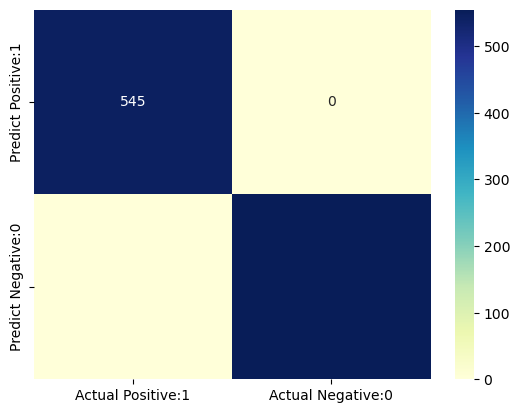

In [43]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Salvar a figura em SVG
plt.savefig('matriz_svm_darpa.svg', format='svg')

# Mostrar a figura
plt.show()

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       545
           1       1.00      1.00      1.00       555

    accuracy                           1.00      1100
   macro avg       1.00      1.00      1.00      1100
weighted avg       1.00      1.00      1.00      1100



In [45]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [46]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 1.0000


In [47]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0000


In [48]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [49]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [50]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 1.0000


In [51]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


In [52]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


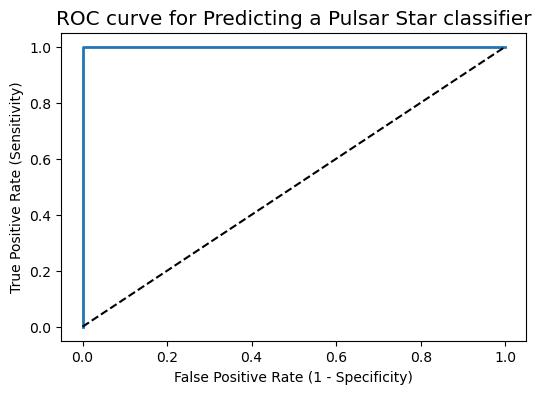

In [53]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [54]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 1.0000


In [55]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 1.0000


In [56]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [57]:
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[1. 1. 1. 1. 1.]


In [58]:
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:1.0000


In [59]:
rbf_svc=SVC(kernel='rbf')


rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [60]:
# print cross-validation scores with rbf kernel

print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-validation scores with rbf kernel:

[0.69818182 0.70090909 0.69727273 0.66181818 0.69181818]


In [61]:
# print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.6900


In [62]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [ ]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))